Welcome to PerfectFit! What is your name?
> athbah
Hi athbah! Please enter your dress code preference (Casual, Sportswear, Business, Evening).
> Casual
Please enter your color palette preference (Dark, Bright).
> Dark
Please enter your comfort level (1 (least comfortable) to 5 (most comfortable)).
> 5
Please enter your budget (in SAR).
> 450

We are working on preparing your optimal outfit...

Plotting the GA performance for the last run...


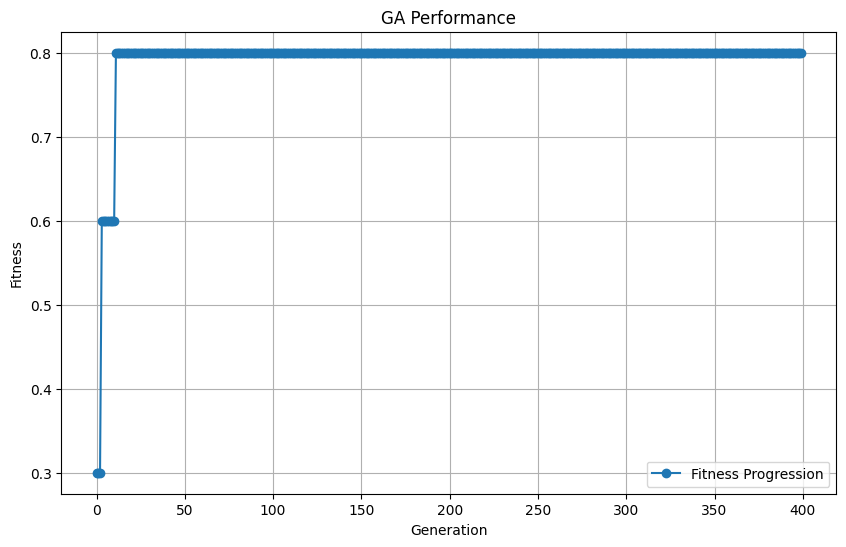


Your outfit selection is ready! Here's your personalized outfit plan:

Top: T-shirt
Bottom: Leggings
Shoes: Sandals
Neck: Athletic Headband
Purse: Canvas Bag

Hope you feel fabulous in your outfit!

Calculating average fitness over 20 runs...

Running the Genetic Algorithm 20 times...
Run 1/20...
Run 2/20...
Run 3/20...
Run 4/20...
Run 5/20...
Run 6/20...
Run 7/20...
Run 8/20...
Run 9/20...
Run 10/20...
Run 11/20...
Run 12/20...
Run 13/20...
Run 14/20...
Run 15/20...
Run 16/20...
Run 17/20...
Run 18/20...
Run 19/20...
Run 20/20...

Average fitness over 20 runs: 0.7900

Plotting fitness progression for all runs...


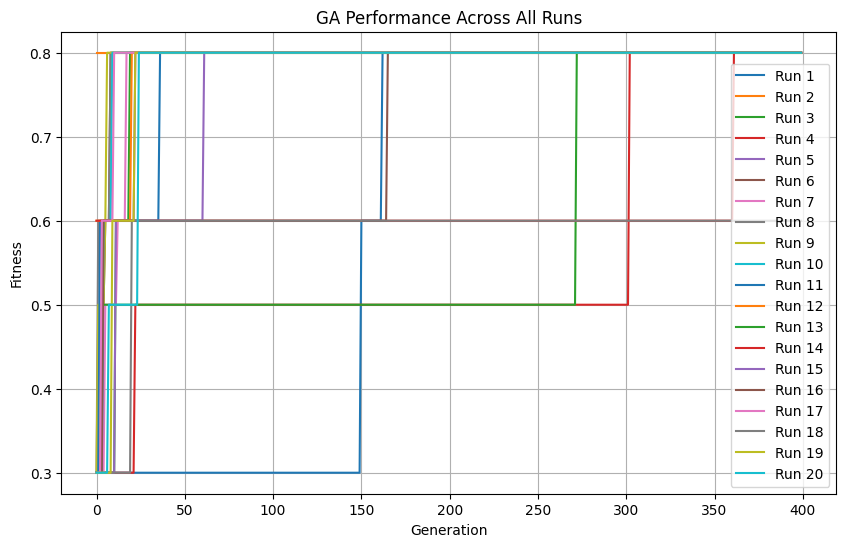

In [ ]:
import random
import matplotlib.pyplot as plt

# Define the inventory
search_space = {
    'Top': [
        ('T-shirt', 0.0, 'Casual', 'Bright', 5),
        ('Formal Shirt', 120.0, 'Business', 'Dark', 3),
        ('Polo Shirt', 80.0, 'Sportswear', 'Bright', 4),
        ('Evening Blouse', 150.0, 'Evening', 'Dark', 3),
        ('Sweater', 0.0, 'Casual', 'Dark', 5),
        ('Hoodie', 60.0, 'Casual', 'Bright', 4),
        ('Tank Top', 0.0, 'Sportswear', 'Bright', 4),
        ('Silk Blouse', 200.0, 'Evening', 'Dark', 3)
    ],
    'Bottom': [
        ('Jeans', 0.0, 'Casual', 'Dark', 4),
        ('Formal Trousers', 150.0, 'Business', 'Dark', 3),
        ('Sports Shorts', 0.0, 'Sportswear', 'Bright', 5),
        ('Skirt', 100.0, 'Evening', 'Bright', 3),
        ('Chinos', 90.0, 'Business', 'Dark', 4),
        ('Leggings', 60.0, 'Casual', 'Dark', 5),
        ('Athletic Pants', 80.0, 'Sportswear', 'Bright', 5),
        ('Evening Gown Bottom', 250.0, 'Evening', 'Dark', 1)
    ],
    'Shoes': [
        ('Sneakers', 0.0, 'Sportswear', 'Bright', 5),
        ('Leather Shoes', 180.0, 'Business', 'Dark', 2),
        ('Running Shoes', 120.0, 'Sportswear', 'Bright', 5),
        ('Ballet Flats', 90.0, 'Casual', 'Dark', 4),
        ('High Heels', 250.0, 'Evening', 'Dark', 2),
        ('Sandals', 0.0, 'Casual', 'Bright', 5),
        ('Loafers', 150.0, 'Business', 'Dark', 3),
        ('Evening Pumps', 220.0, 'Evening', 'Bright', 2)
    ],
    'Neck': [
        ('Silk Scarf', 70.0, 'Business', 'Dark', 3),
        ('Sports Scarf', 0.0, 'Sportswear', 'Bright', 4),
        ('Necklace', 220.0, 'Evening', 'Dark', 3),
        ('Casual Scarf', 0.0, 'Casual', 'Bright', 5),
        ('Bow Tie', 80.0, 'Evening', 'Dark', 3),
        ('Athletic Headband', 50.0, 'Sportswear', 'Bright', 5),
        ('Diamond Necklace', 750.0, 'Evening', 'Bright', 3),
        ('Choker', 0.0, 'Evening', 'Dark', 4)
    ],
    'Purse': [
        ('Clutch Bag', 100.0, 'Evening', 'Dark', 3),
        ('Canvas Bag', 0.0, 'Casual', 'Bright', 5),
        ('Leather Briefcase', 180.0, 'Business', 'Dark', 1),
        ('Sports Backpack', 80.0, 'Sportswear', 'Bright', 5),
        ('Tote Bag', 0.0, 'Casual', 'Bright', 4),
        ('Wristlet', 150.0, 'Evening', 'Dark', 3),
        ('Fanny Pack', 50.0, 'Sportswear', 'Bright', 4),
        ('Elegant Handbag', 250.0, 'Evening', 'Dark', 3)
    ]
}

# Create an initial population
def create_initial_population(pop_size):
    population = []
    for _ in range(pop_size):
        outfit = {
            'Top': random.choice(search_space['Top']),
            'Bottom': random.choice(search_space['Bottom']),
            'Shoes': random.choice(search_space['Shoes']),
            'Neck': random.choice(search_space['Neck']),
            'Purse': random.choice(search_space['Purse'])
        }
        population.append(outfit)
    return population

# Fitness function
def fitness(outfit, dress_code, color_palette, comfort_level, budget):
    weights = [0.30, 0.30, 0.20, 0.20]
    score = 0.0

    # Dress code
    if outfit['Top'][2] == dress_code and outfit['Bottom'][2] == dress_code and outfit['Shoes'][2] == dress_code:
        score += weights[0]

    # Budget
    total_price = sum([outfit[key][1] for key in outfit])
    if total_price <= budget:
        score += weights[1]

    # Color palette
    if all(outfit[key][3] == color_palette for key in outfit):
        score += weights[2]

    # Comfort level
    avg_comfort = sum([outfit[key][4] for key in outfit]) / len(outfit)
    if avg_comfort >= comfort_level:
        score += weights[3]

    return max(0, min(1, score))

# Binary tournament selection
def binary_tournament_selection(population, dress_code, color_palette, comfort_level, budget):
    parents = []
    for _ in range(2):
        a = random.choice(population)
        b = random.choice(population)
        if fitness(a, dress_code, color_palette, comfort_level, budget) > fitness(b, dress_code, color_palette, comfort_level, budget):
            parents.append(a)
        else:
            parents.append(b)
    return parents

# 2-point crossover
    # Get the list of outfit categories (e.g., 'Top', 'Bottom', etc.)
def crossover(parent1, parent2):
    keys = list(parent1.keys())
        # Randomly pick two points for swapping and ensure they are sorted

    point1, point2 = sorted(random.sample(range(len(keys)), 2))
    child1, child2 = {}, {}

    for i, key in enumerate(keys):
              # If the category index is between the two points, swap items
        if point1 < i <= point2:
            child1[key] = parent2[key]
            child2[key] = parent1[key]
        else:
            child1[key] = parent1[key]
            child2[key] = parent2[key]

    return child1, child2

# Mutation
def mutate(outfit, mutation_rate=0.1):
    for category in search_space.keys():
      #random.random() generates a random number between 0 and 1.
      #If this random number is less than the mutation rate (default: 0.1, or 10%), the item in that category will be replaced with a new random choice.
        if random.random() < mutation_rate:
            outfit[category] = random.choice(search_space[category]) #If the category is Top, it might replace "T-shirt" with "Hoodie".
    return outfit

# Replacement
def replace_population(population, offspring, dress_code, color_palette, comfort_level, budget):
    combined = population + offspring
    combined.sort(key=lambda x: fitness(x, dress_code, color_palette, comfort_level, budget), reverse=True)
    return combined[:len(population)] #selects the top outfits from the sorted list, ensuring the new population size matches the original size (len(population)).



def genetic_algorithm(dress_code, color_palette, comfort_level, budget, generations=400, pop_size=10):
    population = create_initial_population(pop_size)
    best_fitness = 0 #Tracks the highest fitness score found so far.
    fitness_over_time = []#stores the best fitness at each generation to track progress.
    best_outfit = None  #  Stores the outfit with the highest fitness.
    optimal_fitness = 0.95 #close to perfect=1

    for generation in range(generations):
        fitness_scores = [(outfit, fitness(outfit, dress_code, color_palette, comfort_level, budget)) for outfit in population]#Each outfit in the population is evaluated using the fitness function, and the scores are stored:
        current_best = max(fitness_scores, key=lambda x: x[1])  # (outfit, fitness)
        #current_best = ({'Top': 'Hoodie', 'Bottom': 'Skirt'}, 0.9)
        #The first part (x[0]): The outfit (e.g., {'Top': 'Hoodie', 'Bottom': 'Skirt'}).
        #The second part (x[1]): The fitness score (e.g., 0.9)
        best_fitness = current_best[1]
        fitness_over_time.append(best_fitness)

        # Update best outfit
        if best_outfit is None or best_fitness > fitness(best_outfit, dress_code, color_palette, comfort_level, budget):
            best_outfit = current_best[0]
            #ensures that best_outfit always holds the outfit with the highest fitness score so far.
            #It updates best_outfit only if a better one is found in the current generation.







        # Termination Conditions
        error_value = abs(optimal_fitness - best_fitness)
        if error_value < 1e-8:
           print(f"Terminated at generation {generation} with error {error_value}")
           break
           #optimal_fitness: The goal fitness value (e.g., 0.95).
#best_fitness: The highest fitness score found so far.
#error_value: The difference between optimal_fitness and best_fitness.
#If error_value is very small (less than 1e-8), it means the best solution is almost perfect, so the algorithm stops early.

        new_population = []
        for _ in range(len(population) // 2):
            parents = binary_tournament_selection(population, dress_code, color_palette, comfort_level, budget)
            offspring1, offspring2 = crossover(parents[0], parents[1])
            offspring1 = mutate(offspring1)
            offspring2 = mutate(offspring2)
            new_population.extend([offspring1, offspring2])

        population = replace_population(population, new_population, dress_code, color_palette, comfort_level, budget)

    return best_outfit, fitness_over_time


# Plot GA Performance for a single run
def plot_ga_performance(fitness_over_time):
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(fitness_over_time)), fitness_over_time, marker='o', label="Fitness Progression")
    plt.title("GA Performance")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.grid(True)
    plt.legend()
    plt.show()


# Plot GA Performance for multiple runs
def plot_ga_performance_all_runs(all_fitness_over_time):
    plt.figure(figsize=(10, 6))
    for i, fitness_over_time in enumerate(all_fitness_over_time):
        plt.plot(range(len(fitness_over_time)), fitness_over_time, label=f"Run {i + 1}")
    plt.title("GA Performance Across All Runs")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.grid(True)
    plt.legend()
    plt.show()

# Main function to run experiments
def run_experiments(dress_code, color_palette, comfort_level, budget, runs=20):
    print("\nRunning the Genetic Algorithm 20 times...")
    fitness_results = []
    all_fitness_over_time = []  # Store fitness progression for all runs

    for run in range(runs):
        print(f"Run {run + 1}/{runs}...")
        _, fitness_over_time = genetic_algorithm(dress_code, color_palette, comfort_level, budget)
        fitness_results.append(fitness_over_time[-1])  # Append the best fitness of the run
        all_fitness_over_time.append(fitness_over_time)  # Store the entire fitness progression for this run

    average_fitness = sum(fitness_results) / len(fitness_results)
    print(f"\nAverage fitness over {runs} runs: {average_fitness:.4f}")

    # Plot fitness progression for all runs
    print("\nPlotting fitness progression for all runs...")
    plot_ga_performance_all_runs(all_fitness_over_time)

    return average_fitness

# Main function
def main():
    print("Welcome to PerfectFit! What is your name?")
    name = input("> ")
    print(f"Hi {name}! Please enter your dress code preference (Casual, Sportswear, Business, Evening).")
    dress_code = input("> ").capitalize()
    print("Please enter your color palette preference (Dark, Bright).")
    color_palette = input("> ").capitalize()
    print("Please enter your comfort level (1 (least comfortable) to 5 (most comfortable)).")
    comfort_level = int(input("> "))
    print("Please enter your budget (in SAR).")
    budget = float(input("> "))

    print("\nWe are working on preparing your optimal outfit...")
    best_outfit, fitness_over_time = genetic_algorithm(dress_code, color_palette, comfort_level, budget)

    # Check if a valid outfit was found
    if best_outfit is None:
        print("\nNo valid outfit could be generated. Please try adjusting your preferences.")
        return

    # Plot fitness graph for a single run
    print("\nPlotting the GA performance for the last run...")
    plot_ga_performance(fitness_over_time)

    # Display the best outfit
    print("\nYour outfit selection is ready! Here's your personalized outfit plan:")
    print(f"\n\033[1;31mTop:\033[0m {best_outfit['Top'][0]}")
    print(f"\033[1;31mBottom:\033[0m {best_outfit['Bottom'][0]}")
    print(f"\033[1;31mShoes:\033[0m {best_outfit['Shoes'][0]}")
    print(f"\033[1;31mNeck:\033[0m {best_outfit['Neck'][0]}")
    print(f"\033[1;31mPurse:\033[0m {best_outfit['Purse'][0]}")

    print("\nHope you feel fabulous in your outfit!")

    # Run experiments to compute average fitness over 20 runs
    print("\nCalculating average fitness over 20 runs...")
    avg_fitness = run_experiments(dress_code, color_palette, comfort_level, budget)
   # print(f"Average fitness across 20 runs: {avg_fitness:.4f}")

if __name__ == "__main__":
    main()
